Left Kidney Features:
Mean Intensity: 46.58763888888889
Standard Deviation: 42.36415987184659
Contrast (GLCM): 157.87752808988768
Energy (GLCM): 0.03475917880645454

Right Kidney Features:
Mean Intensity: 61.061875
Standard Deviation: 48.008572635357275
Contrast (GLCM): 182.41590909090903
Energy (GLCM): 0.028823299138141963


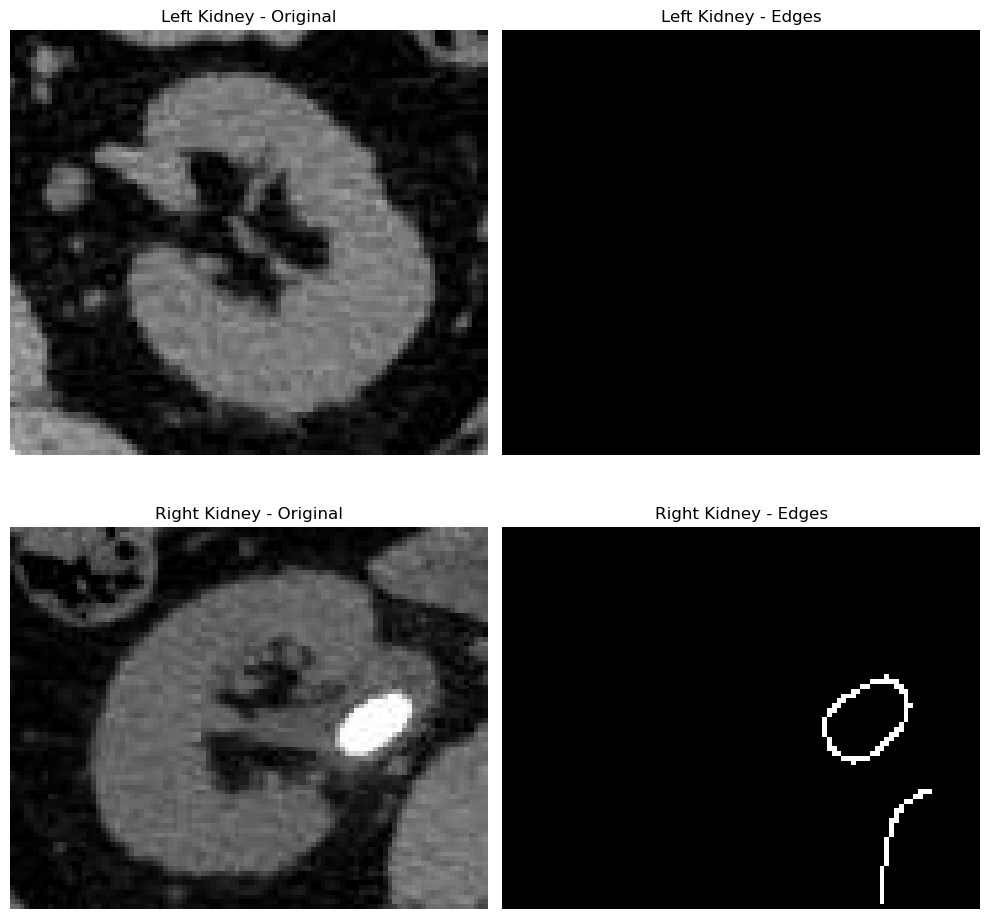

In [11]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops, canny
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-cropped left and right kidney images
left_kidney_path = "stone/left_kidney_cropped.jpg"  # Replace with the actual file path
right_kidney_path = "stone/right_kidney_cropped.jpg"  # Replace with the actual file path

left_kidney = Image.open(left_kidney_path).convert('L')  # Convert to grayscale
right_kidney = Image.open(right_kidney_path).convert('L')  # Convert to grayscale

# Convert the cropped images to NumPy arrays
left_kidney_array = np.array(left_kidney)
right_kidney_array = np.array(right_kidney)

# Feature Extraction Function
def extract_features(image_array):
    # Mean and Standard Deviation
    mean_intensity = np.mean(image_array)
    std_intensity = np.std(image_array)

    # GLCM (Gray Level Co-occurrence Matrix) Features
    glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]

    # Canny Edge Detection
    edges = canny(image_array,sigma=6)

    return {
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "contrast": contrast,
        "energy": energy,
        "edges": edges,
    }

# Extract features for left and right kidneys
left_features = extract_features(left_kidney_array)
right_features = extract_features(right_kidney_array)

# Display features for both kidneys
print("Left Kidney Features:")
print(f"Mean Intensity: {left_features['mean_intensity']}")
print(f"Standard Deviation: {left_features['std_intensity']}")
print(f"Contrast (GLCM): {left_features['contrast']}")
print(f"Energy (GLCM): {left_features['energy']}")

print("\nRight Kidney Features:")
print(f"Mean Intensity: {right_features['mean_intensity']}")
print(f"Standard Deviation: {right_features['std_intensity']}")
print(f"Contrast (GLCM): {right_features['contrast']}")
print(f"Energy (GLCM): {right_features['energy']}")

# Plot the edges for visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Left Kidney
axes[0, 0].imshow(left_kidney_array, cmap='gray')
axes[0, 0].set_title("Left Kidney - Original")
axes[0, 0].axis("off")

axes[0, 1].imshow(left_features['edges'], cmap='gray')
axes[0, 1].set_title("Left Kidney - Edges")
axes[0, 1].axis("off")

# Right Kidney
axes[1, 0].imshow(right_kidney_array, cmap='gray')
axes[1, 0].set_title("Right Kidney - Original")
axes[1, 0].axis("off")

axes[1, 1].imshow(right_features['edges'], cmap='gray')
axes[1, 1].set_title("Right Kidney - Edges")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


Left Kidney Features:
mean_intensity: 46.5876
std_intensity: 42.3642
min_intensity: 0.0000
max_intensity: 210.0000
median_intensity: 25.0000
variance: 1794.7220
skewness: 0.4051
kurtosis: -1.5195
range: 210.0000
coefficient_of_variation: 0.9093
contrast: 157.8775
energy: 0.0348
homogeneity: 0.1637
correlation: 0.9559
angular_second_moment: 0.0012
dissimilarity: 8.3497
entropy: 6.4014
edge_density: 0.0000
number_of_edges: 0.0000
proportion_of_edge_pixels: 0.0000

Right Kidney Features:
mean_intensity: 61.0619
std_intensity: 48.0086
min_intensity: 0.0000
max_intensity: 255.0000
median_intensity: 66.0000
variance: 2304.8230
skewness: 0.7968
kurtosis: 1.5967
range: 255.0000
coefficient_of_variation: 0.7862
contrast: 182.4159
energy: 0.0288
homogeneity: 0.1621
correlation: 0.9604
angular_second_moment: 0.0008
dissimilarity: 8.6013
entropy: 6.7695
edge_density: 0.0115
number_of_edges: 92.0000
proportion_of_edge_pixels: 0.0115


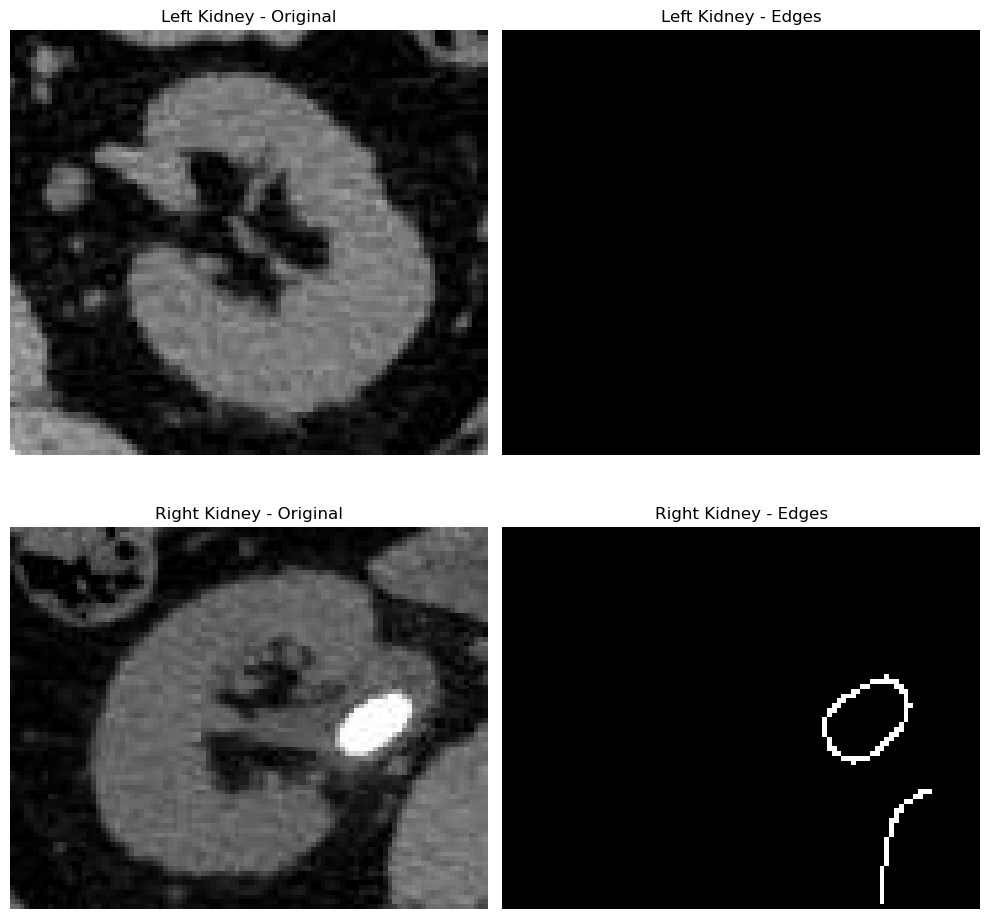

In [13]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops, canny
from scipy.stats import kurtosis, skew, entropy
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-cropped left and right kidney images
left_kidney_path = "stone/left_kidney_cropped.jpg"  # Replace with actual file path
right_kidney_path = "stone/right_kidney_cropped.jpg"  # Replace with actual file path

left_kidney = Image.open(left_kidney_path).convert('L')  # Convert to grayscale
right_kidney = Image.open(right_kidney_path).convert('L')  # Convert to grayscale

# Convert images to NumPy arrays
left_kidney_array = np.array(left_kidney)
right_kidney_array = np.array(right_kidney)

# Feature Extraction Function
def extract_features(image_array):
    features = {}

    # Intensity Features
    features["mean_intensity"] = np.mean(image_array)
    features["std_intensity"] = np.std(image_array)
    features["min_intensity"] = np.min(image_array)
    features["max_intensity"] = np.max(image_array)
    features["median_intensity"] = np.median(image_array)
    features["variance"] = np.var(image_array)
    features["skewness"] = skew(image_array.flatten())
    features["kurtosis"] = kurtosis(image_array.flatten())
    features["range"] = np.max(image_array) - np.min(image_array)
    features["coefficient_of_variation"] = np.std(image_array) / np.mean(image_array)

    # GLCM Features
    glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features["contrast"] = graycoprops(glcm, 'contrast')[0, 0]
    features["energy"] = graycoprops(glcm, 'energy')[0, 0]
    features["homogeneity"] = graycoprops(glcm, 'homogeneity')[0, 0]
    features["correlation"] = graycoprops(glcm, 'correlation')[0, 0]
    features["angular_second_moment"] = graycoprops(glcm, 'ASM')[0, 0]
    features["dissimilarity"] = graycoprops(glcm, 'dissimilarity')[0, 0]

    # Entropy
    hist, _ = np.histogram(image_array.flatten(), bins=256, range=(0, 256))
    features["entropy"] = entropy(hist, base=2)

    # Canny Edge Detection
    edges = canny(image_array, sigma=6)
    edge_count = np.sum(edges)
    total_pixels = image_array.size
    features["edge_density"] = edge_count / total_pixels
    features["number_of_edges"] = edge_count
    features["proportion_of_edge_pixels"] = edge_count / total_pixels

    return features, edges

# Extract features for left and right kidneys
left_features, left_edges = extract_features(left_kidney_array)
right_features, right_edges = extract_features(right_kidney_array)

# Display features for both kidneys
print("Left Kidney Features:")
for key, value in left_features.items():
    print(f"{key}: {value:.4f}")

print("\nRight Kidney Features:")
for key, value in right_features.items():
    print(f"{key}: {value:.4f}")

# Plot the edges for visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Left Kidney
axes[0, 0].imshow(left_kidney_array, cmap='gray')
axes[0, 0].set_title("Left Kidney - Original")
axes[0, 0].axis("off")

axes[0, 1].imshow(left_edges, cmap='gray')
axes[0, 1].set_title("Left Kidney - Edges")
axes[0, 1].axis("off")

# Right Kidney
axes[1, 0].imshow(right_kidney_array, cmap='gray')
axes[1, 0].set_title("Right Kidney - Original")
axes[1, 0].axis("off")

axes[1, 1].imshow(right_edges, cmap='gray')
axes[1, 1].set_title("Right Kidney - Edges")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
!git add .
!git commit -m" feature extracted from seperated k